In [31]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [32]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [33]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [34]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [35]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

ushuaia ar
tiksi ru
bredasdorp za
beatrice us
gore et
sentyabrskiy ru
punta arenas cl
punta arenas cl
rikitea pf
svetlogorsk ru
coahuayana mx
panzhihua cn
kapaa us
hithadhoo mv
merauke id
bambous virieux mu
dodoma tz
pisco pe
souillac mu
albany au
pisco pe
samusu ws
luderitz na
iqaluit ca
hithadhoo mv
khatanga ru
sitka us
vostok ru
mataura pf
santa maria br
rikitea pf
mataura pf
carnarvon au
ushuaia ar
hermanus za
illoqqortoormiut gl
rikitea pf
rikitea pf
nyurba ru
kysyl-syr ru
barrow us
khudumelapye bw
torbay ca
hilo us
tuktoyaktuk ca
illoqqortoormiut gl
ushuaia ar
rikitea pf
hobart au
tateyama jp
ushuaia ar
tasiilaq gl
porto novo cv
qaanaaq gl
peniche pt
hermanus za
busselton au
ilulissat gl
matara lk
hilo us
mataura pf
hobart au
taolanaro mg
bethel us
kirakira sb
sorland no
saint-philippe re
moerai pf
iquitos pe
hermanus za
east london za
avarua ck
creel mx
ndele cf
burnie au
bethel us
korla cn
hermanus za
buala sb
killybegs ie
vaini to
hede cn
rikitea pf
port alfred za
rikitea pf
k

arraial do cabo br
agadez ne
vaini to
nikolskoye ru
farkhor tj
castro cl
kaitangata nz
samarai pg
oistins bb
yambio sd
camacha pt
oswego us
youghal ie
port lavaca us
tuktoyaktuk ca
richards bay za
beloha mg
ushuaia ar
syracuse us
viru pe
punta arenas cl
eirunepe br
bredasdorp za
ostrovnoy ru
atuona pf
bluff nz
kiruna se
takaungu ke
katsuura jp
grand river south east mu
hilo us
hobart au
tidore id
belushya guba ru
qaanaaq gl
aswan eg
neuquen ar
mataura pf
hermanus za
cidreira br
georgetown sh
izhma ru
tiksi ru
kamakwie sl
cape town za
artyk ru
westport nz
port-de-paix ht
busselton au
cherskiy ru
khatanga ru
avarua ck
port alfred za
gat ly
port elizabeth za
port said eg
albany au
montgomery us
lephepe bw
bredasdorp za
atid ro
lashio mm
shulan cn
ilulissat gl
rafai cf
leningradskiy ru
buhe cn
taolanaro mg
amderma ru
jalu ly
konakovo ru
yuli tw
kushiro jp
bac lieu vn
kapaa us
flin flon ca
asau tv
butaritari ki
cidreira br
butaritari ki
mys shmidta ru
mercedes ar
bandarbeyla so
tumannyy ru


In [36]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [37]:
#Import dependencies
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [38]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1    

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")  

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | ushuaia
Processing Record 2 of Set 13 | tiksi
Processing Record 3 of Set 13 | bredasdorp
Processing Record 4 of Set 13 | beatrice
Processing Record 5 of Set 13 | gore
Processing Record 6 of Set 13 | sentyabrskiy
City not found. Skipping...
Processing Record 7 of Set 13 | punta arenas
Processing Record 8 of Set 13 | rikitea
Processing Record 9 of Set 13 | svetlogorsk
Processing Record 10 of Set 13 | coahuayana
Processing Record 11 of Set 13 | panzhihua
Processing Record 12 of Set 13 | kapaa
Processing Record 13 of Set 13 | hithadhoo
Processing Record 14 of Set 13 | merauke
Processing Record 15 of Set 13 | bambous virieux
Processing Record 16 of Set 13 | dodoma
Processing Record 17 of Set 13 | pisco
Processing Record 18 of Set 13 | souillac
Processing Record 19 of Set 13 | albany
Processing Record 20 of Set 13 | samusu
City not found. Skipping...
Processing Record 21 of Set 13 | luderitz
Processin

Processing Record 35 of Set 16 | cabo san lucas
Processing Record 36 of Set 16 | hay river
Processing Record 37 of Set 16 | cockburn town
Processing Record 38 of Set 16 | tonj
Processing Record 39 of Set 16 | faanui
Processing Record 40 of Set 16 | cherskiy
Processing Record 41 of Set 16 | muros
Processing Record 42 of Set 16 | lebu
Processing Record 43 of Set 16 | amderma
City not found. Skipping...
Processing Record 44 of Set 16 | sikonge
Processing Record 45 of Set 16 | haibowan
City not found. Skipping...
Processing Record 46 of Set 16 | teguldet
Processing Record 47 of Set 16 | jiangyou
Processing Record 48 of Set 16 | sharjah
Processing Record 49 of Set 16 | sungaipenuh
Processing Record 50 of Set 16 | gamba
Processing Record 1 of Set 17 | saurimo
Processing Record 2 of Set 17 | horasan
Processing Record 3 of Set 17 | cap malheureux
Processing Record 4 of Set 17 | barinas
Processing Record 5 of Set 17 | padang
Processing Record 6 of Set 17 | pevek
Processing Record 7 of Set 17 | 

Processing Record 15 of Set 20 | iquique
Processing Record 16 of Set 20 | itaituba
Processing Record 17 of Set 20 | tuatapere
Processing Record 18 of Set 20 | camacupa
Processing Record 19 of Set 20 | teneguiban
City not found. Skipping...
Processing Record 20 of Set 20 | skowhegan
Processing Record 21 of Set 20 | necochea
Processing Record 22 of Set 20 | cidreira
Processing Record 23 of Set 20 | kuche
City not found. Skipping...
Processing Record 24 of Set 20 | elko
Processing Record 25 of Set 20 | troitsko-pechorsk
Processing Record 26 of Set 20 | chuguyevka
Processing Record 27 of Set 20 | rantepao
Processing Record 28 of Set 20 | juifang
City not found. Skipping...
Processing Record 29 of Set 20 | hobyo
Processing Record 30 of Set 20 | gizo
Processing Record 31 of Set 20 | the valley
Processing Record 32 of Set 20 | nevyansk
Processing Record 33 of Set 20 | muscat
Processing Record 34 of Set 20 | pangnirtung
Processing Record 35 of Set 20 | eregli
Processing Record 36 of Set 20 | b

Processing Record 2 of Set 24 | uyuni
Processing Record 3 of Set 24 | atar
Processing Record 4 of Set 24 | porkhov
Processing Record 5 of Set 24 | khorinsk
Processing Record 6 of Set 24 | adrar
Processing Record 7 of Set 24 | lolua
City not found. Skipping...
Processing Record 8 of Set 24 | herat
Processing Record 9 of Set 24 | sayansk
Processing Record 10 of Set 24 | wuzhou
Processing Record 11 of Set 24 | quelimane
Processing Record 12 of Set 24 | emirdag
Processing Record 13 of Set 24 | doctor arroyo
Processing Record 14 of Set 24 | sompeta
Processing Record 15 of Set 24 | hirara
Processing Record 16 of Set 24 | erzin
Processing Record 17 of Set 24 | ferkessedougou
Processing Record 18 of Set 24 | alice springs
Processing Record 19 of Set 24 | cagua
Processing Record 20 of Set 24 | dwarka
Processing Record 21 of Set 24 | muriti
Processing Record 22 of Set 24 | ucluelet
Processing Record 23 of Set 24 | payakumbuh
Processing Record 24 of Set 24 | auki
Processing Record 25 of Set 24 | 

In [39]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,38.86,81,40,6.91,AR,2021-10-11 02:09:20
1,Tiksi,71.6872,128.8694,29.80,97,100,7.70,RU,2021-10-11 02:09:20
2,Bredasdorp,-34.5322,20.0403,55.27,67,100,3.69,ZA,2021-10-11 02:09:20
3,Beatrice,40.2681,-96.7470,60.01,100,90,0.00,US,2021-10-11 02:09:21
4,Gore,-46.1028,168.9436,47.23,98,100,5.19,NZ,2021-10-11 02:09:21
5,Punta Arenas,-53.1500,-70.9167,46.51,49,40,28.77,CL,2021-10-11 02:09:21
6,Rikitea,-23.1203,-134.9692,74.84,77,100,14.90,PF,2021-10-11 02:09:22
7,Svetlogorsk,52.6333,29.7333,36.37,71,16,4.34,BY,2021-10-11 02:09:22
8,Coahuayana,18.7333,-103.6833,83.68,92,96,4.05,MX,2021-10-11 02:09:22
9,Panzhihua,26.5851,101.7128,72.37,70,68,1.57,CN,2021-10-11 02:09:23


In [40]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-10-11 02:09:20,-54.8000,-68.3000,38.86,81,40,6.91
1,Tiksi,RU,2021-10-11 02:09:20,71.6872,128.8694,29.80,97,100,7.70
2,Bredasdorp,ZA,2021-10-11 02:09:20,-34.5322,20.0403,55.27,67,100,3.69
3,Beatrice,US,2021-10-11 02:09:21,40.2681,-96.7470,60.01,100,90,0.00
4,Gore,NZ,2021-10-11 02:09:21,-46.1028,168.9436,47.23,98,100,5.19


In [41]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [42]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

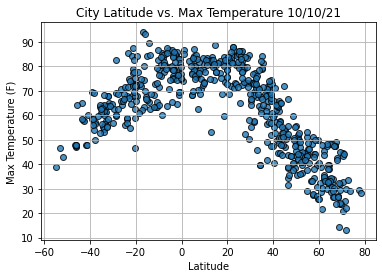

In [43]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

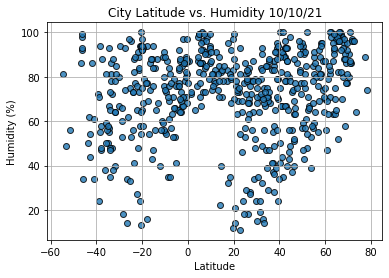

In [44]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

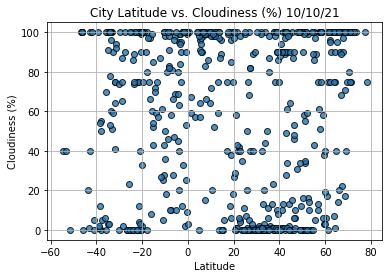

In [45]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

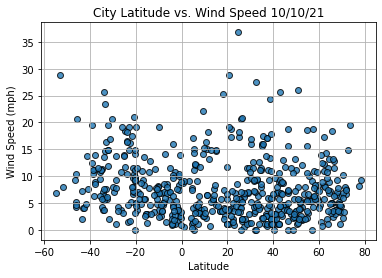

In [46]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [47]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [48]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Tiksi,RU,2021-10-11 02:09:20,71.6872,128.8694,29.80,97,100,7.70
3,Beatrice,US,2021-10-11 02:09:21,40.2681,-96.7470,60.01,100,90,0.00
7,Svetlogorsk,BY,2021-10-11 02:09:22,52.6333,29.7333,36.37,71,16,4.34
8,Coahuayana,MX,2021-10-11 02:09:22,18.7333,-103.6833,83.68,92,96,4.05
9,Panzhihua,CN,2021-10-11 02:09:23,26.5851,101.7128,72.37,70,68,1.57


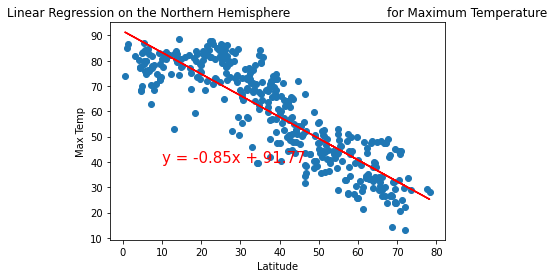

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

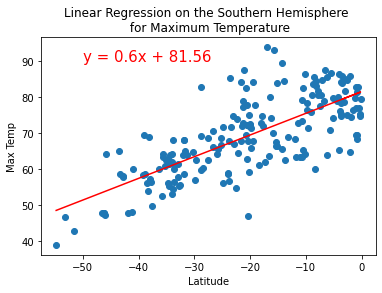

In [51]:
#Linear regression on the Southern Hemisphere (Max Temp)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp', (-50,90))

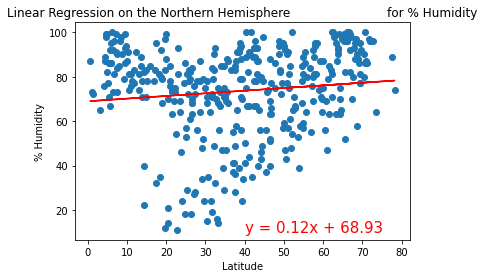

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

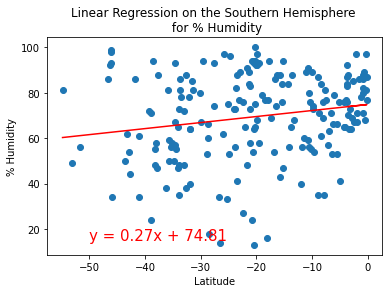

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity', (-50,15))


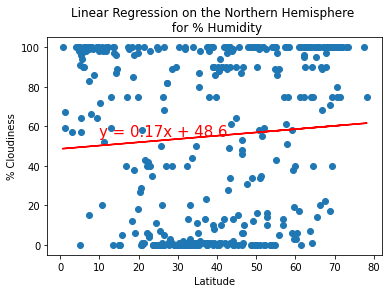

In [64]:
# Skill Drill
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Cloudiness', (10,55))

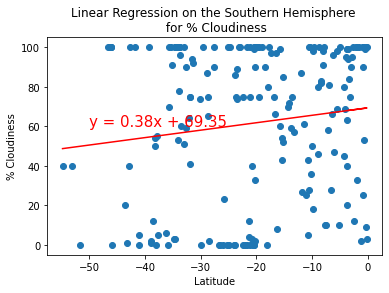

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness', (-50,60))


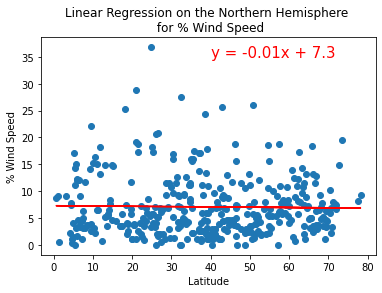

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Wind Speed', 
                       '% Wind Speed', (40,35))


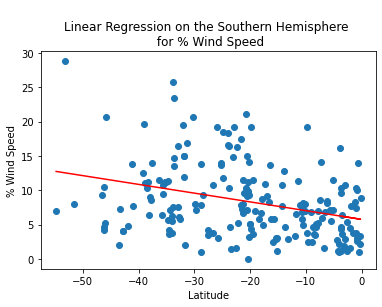

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Wind Speed', 
                       '% Wind Speed', (-50,35))
